# 손글씨 분류
---

__목표 :__ 손글씨 이미지를 0~9까지 10가지 카테고리 분류

# 0. 환경
* Window 10 (Local)
* scikit learn 0.23.2
* numpy 1.20.2
* conda 4.8.3

## 1. 필요한 모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 2. 데이터 준비

In [2]:
digits = load_digits()

## 3. 데이터 이해하기

* Feature Data 지정하기

In [3]:
digits_data = digits.data # digits_data.shape = (1797, 64)
print(digits_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


* Label Data 지정하기

In [4]:
digits_label = digits.target
print(digits_label)

[0 1 2 ... 8 9 8]


* Target Names 출력

In [5]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


* 데이터 Discribe

In [6]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

## 4. train, test 데이터 분리

In [7]:
# data = 8 : 2 / train : test ratio

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size = 0.2,
                                                   random_state=16)

## 5. 다양한 모델로 학습시켜보기
* Decision Tree
* Random Forest
* SVM (Support Vector Machine)
* SGD (Stochastic Gradient Descent)
* Logistic Regression

In [8]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DT_y_pred = decision_tree.predict(X_test)

In [9]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RF_y_pred = random_forest.predict(X_test)

In [10]:
svm_model = svm.SVC()                     
svm_model.fit(X_train, y_train)

SVM_y_pred = svm_model.predict(X_test)

In [11]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGD_y_pred = sgd_model.predict(X_test)

In [12]:
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LR_y_pred = logistic_model.predict(X_test)

* sklearn version 0.23.2에서 logistic regression을 사용할 때 버그 발생.
  * solver = 'liblinear'로 사용.

## 6. 모델 평가

### Decision Tree 평가

acc : 0.8416666666666667
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.76      0.82      0.79        34
           2       0.82      0.89      0.85        35
           3       0.88      0.81      0.85        37
           4       0.84      0.79      0.82        39
           5       0.87      0.90      0.89        30
           6       0.87      0.97      0.92        35
           7       0.90      0.84      0.87        44
           8       0.87      0.75      0.81        36
           9       0.73      0.77      0.75        35

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

----------------------------------------------------------------------


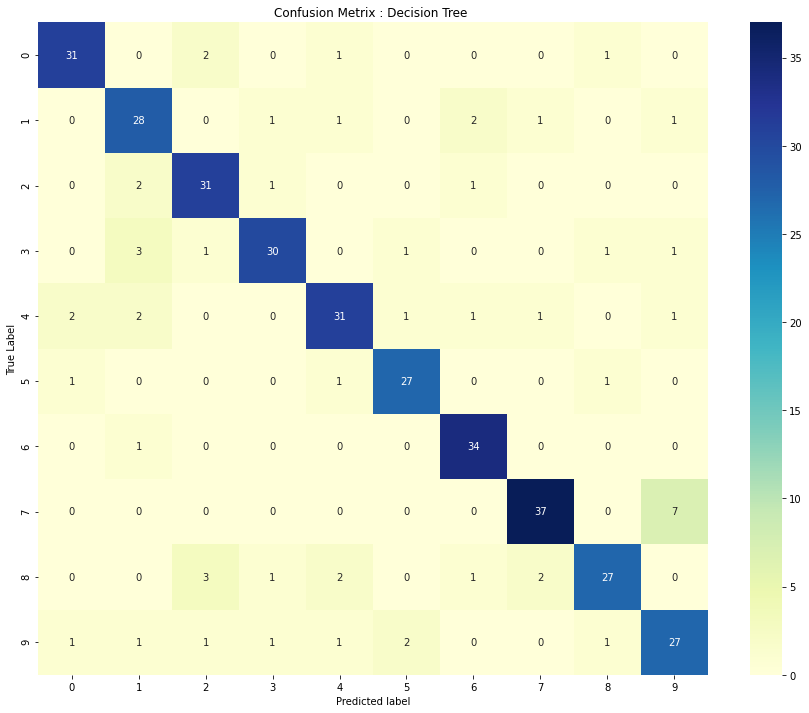

In [13]:
print('acc :',accuracy_score(y_test, DT_y_pred))
print('--'*35)
print(classification_report(y_test, DT_y_pred))
print('--'*35)
plt.figure(figsize=(15,12))
cm = confusion_matrix(y_test, DT_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Decision Tree ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest 평가

acc : 0.9805555555555555
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        39
           5       1.00      0.93      0.97        30
           6       1.00      1.00      1.00        35
           7       0.98      0.98      0.98        44
           8       0.92      0.94      0.93        36
           9       0.97      0.94      0.96        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

----------------------------------------------------------------------


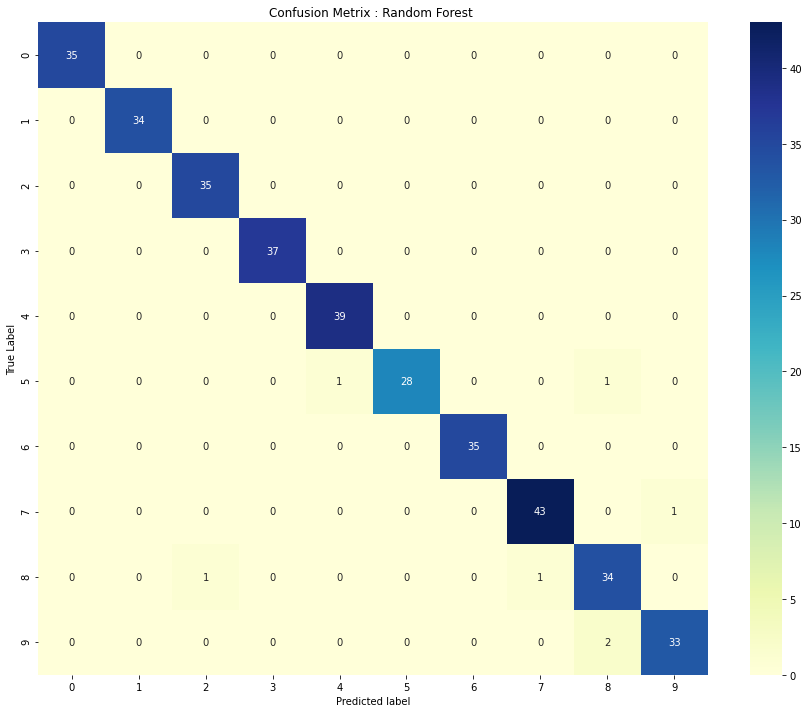

In [14]:
print('acc :',accuracy_score(y_test, RF_y_pred))
print('--'*35)
print(classification_report(y_test, RF_y_pred))
print('--'*35)
plt.figure(figsize=(15,12))
cm = confusion_matrix(y_test, RF_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Random Forest ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SVM (Support Vector Machine) 평가

acc : 0.9916666666666667
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        35
           7       1.00      0.98      0.99        44
           8       0.97      0.97      0.97        36
           9       0.97      0.97      0.97        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

----------------------------------------------------------------------


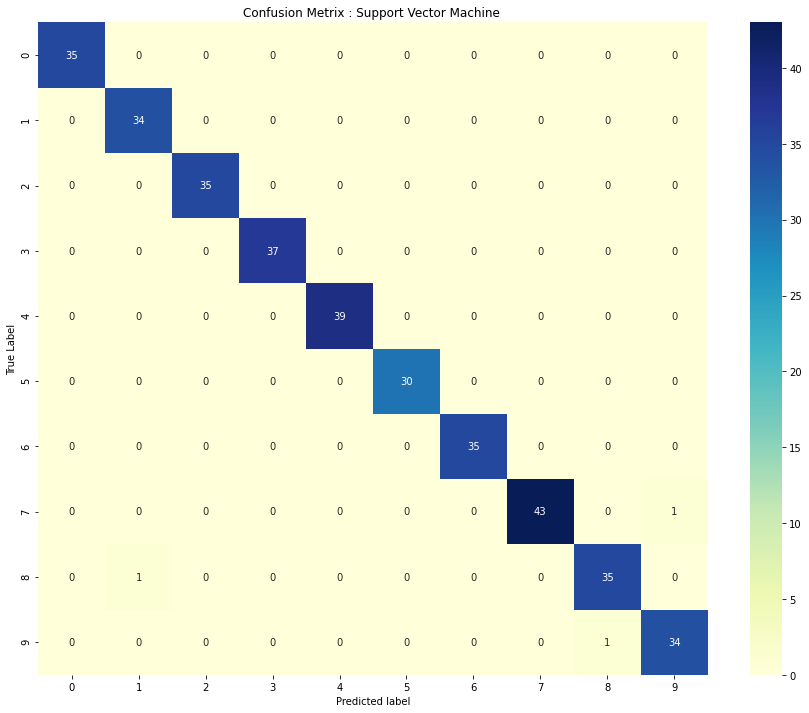

In [15]:
print('acc :',accuracy_score(y_test, SVM_y_pred))
print('--'*35)
print(classification_report(y_test, SVM_y_pred))
print('--'*35)
plt.figure(figsize=(15,12))
cm = confusion_matrix(y_test, SVM_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Support Vector Machine ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SGD (Stochastic Gradient Descent) 평가

acc : 0.9527777777777777
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.91      0.93        34
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.97      0.97      0.97        39
           5       0.91      1.00      0.95        30
           6       0.95      1.00      0.97        35
           7       0.95      0.93      0.94        44
           8       0.86      0.89      0.88        36
           9       0.94      0.86      0.90        35

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

----------------------------------------------------------------------


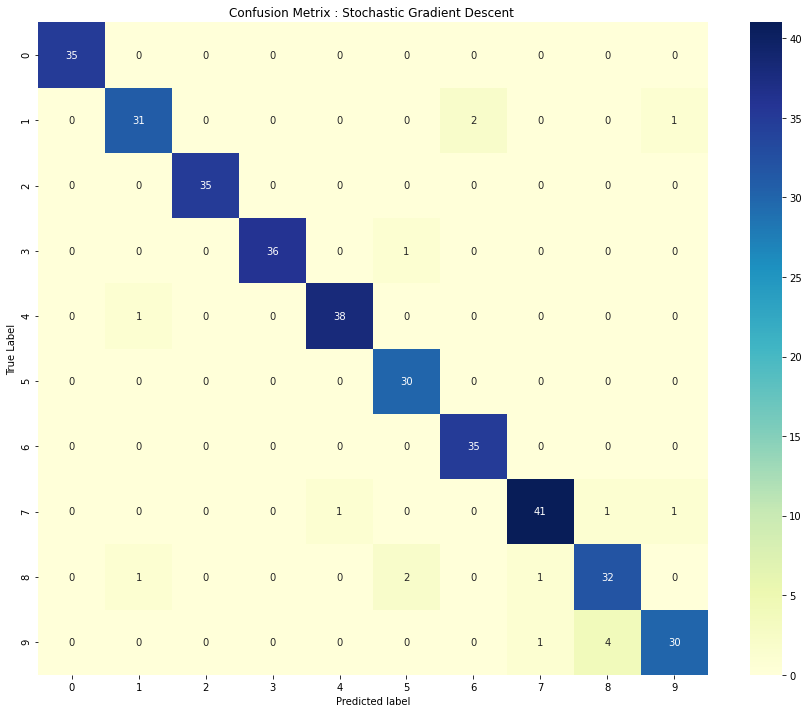

In [16]:
print('acc :',accuracy_score(y_test, SGD_y_pred))
print('--'*35)
print(classification_report(y_test, SGD_y_pred))
print('--'*35)
plt.figure(figsize=(15,12))
cm = confusion_matrix(y_test, SGD_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Stochastic Gradient Descent ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Logistic Regression 평가

acc : 0.9527777777777777
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.94      0.88      0.91        34
           2       1.00      1.00      1.00        35
           3       0.95      0.97      0.96        37
           4       0.97      0.97      0.97        39
           5       0.91      0.97      0.94        30
           6       0.95      1.00      0.97        35
           7       0.98      0.93      0.95        44
           8       0.94      0.89      0.91        36
           9       0.89      0.94      0.92        35

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

----------------------------------------------------------------------


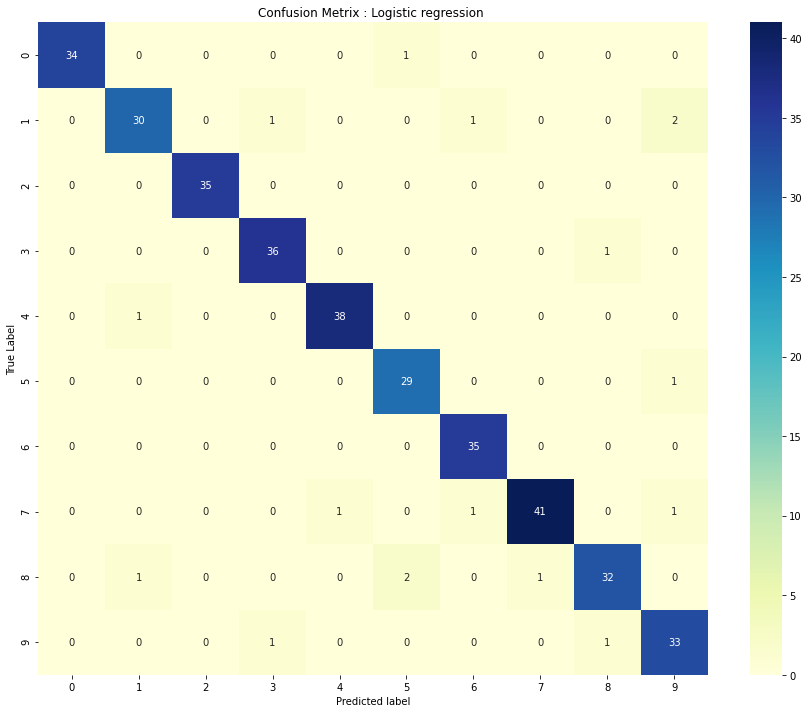

In [17]:
print('acc :',accuracy_score(y_test, LR_y_pred))
print('--'*35)
print(classification_report(y_test, LR_y_pred))
print('--'*35)
plt.figure(figsize=(15,12))
cm = confusion_matrix(y_test, LR_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Logistic regression ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

## 7. 정리

### 7.0 precision / recall / f1 score
* suport를 전부 계산하면 360개
* Decision Tree, Random Forest, SVM (Support Vector Machine), SGD (Stochastic Gradient Descent), Logistic Regression 중 Decision Tree를 제외하고 정확도가 다 높게 나왔음
* 원인은 7을 9로 7개 정도 잘못 맞췄기 때문에 이 비중으로 인해 acc 및 precision/recall/f1 score의 전체 평균이 다 감소되었음을 확인할 수 있었음

### 7.1 confusion metrix
* 각 모델별로 confusion metrics를 heatmap으로 시각화하여 살펴보았음.
     * sklearn.metrics 내부에 plot_confusion_matrix를 사용하면 heatmap을 그릴 수 있음.
     * 그러나 target_names의 reshape가 맞추기 쉽지않아서 다른 길을 선택
     
     
 * 0~9까지 10개의 label에서 모델이 예측한 개수와 정답 label 개수를 비교
 * digits.target은 360개이며 이것을 10으로 나누면 각 36개 정도로 나누어짐
 * 파란색 대각선은 예측과 정답이 겹치는 구간으로 각 숫자별로 맞춘것을 의미
 * 만약 True label 숫자 0에서 예측이 1로 되었다면 Predicted label에서 1에 찍힘.
     * 이것이 의미하는 바는 모델이 0이 아닌 1을 가리키며 잘못 예측됨을 확인
     
### 7.2 생각
* 데이터의 비율이 일정하고 편향됨이 없는 것으로 사료되어 좋은 결과를 보여줌
* Random Forest(ensemble)가 5개의 모델 중에서 제일 분류가 잘됨.